In [41]:
# Example assignment

In [1]:
from pyspark import SparkContext
sc = SparkContext()

In [2]:
logFile = "seven stairs excerpt.txt"

In [3]:
logData = sc.textFile(logFile).cache()

In [8]:
logData.count()

114

In [9]:
logData.first()

'  1'

In [6]:
numAs = logData.filter(lambda s: 'a' in s).count()
numBs = logData.filter(lambda s: 'b' in s).count()
print ('lines with a: %i' % numAs)
print ('lines with b: %i' % numBs)

lines with a: 88
lines with b: 58


In [7]:
wordCounts = logData.flatMap(lambda line: line.split()).map(lambda word: (word,1)).reduceByKey(lambda a, b: a+b)

In [11]:
# Your turn

In [12]:
logFile = "tomjones.txt"

In [13]:
logData = sc.textFile(logFile).cache()

In [14]:
logData.count()

35669

In [15]:
logData.first()

"Project Gutenberg's The History of Tom Jones, a Foundling, by Henry Fielding"

In [16]:
logData.take(10)

["Project Gutenberg's The History of Tom Jones, a Foundling, by Henry Fielding",
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '',
 'Title: The History of Tom Jones, a Foundling',
 '']

In [42]:
logData.collect()

["Project Gutenberg's The History of Tom Jones, a Foundling, by Henry Fielding",
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '',
 'Title: The History of Tom Jones, a Foundling',
 '',
 'Author: Henry Fielding',
 '',
 '',
 'Release Date: September, 2004  [EBook #6593]',
 'This file was first posted on December 29, 2002',
 'Last Updated: March 15, 2018',
 '',
 'Language: English',
 '',
 'Character set encoding: UTF-8',
 '',
 '*** START OF THIS PROJECT GUTENBERG EBOOK HISTORY OF TOM JONES ***',
 '',
 '',
 '',
 '',
 'Produced by Carlo Traverso, Charles Franks, and the Online',
 'Distributed Proofreading Team. This file has been',
 'cross-checked with 2 other different editions available',
 'on-line',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'THE HISTORY OF T

In [19]:
numCs = logData.filter(lambda s: 'c' in s).count()
numDs = logData.filter(lambda s: 'd' in s).count()
print ('lines with c: %i' % numCs)
print ('lines with d: %i' % numDs)

lines with c: 21297
lines with d: 26701


In [23]:
wordCounts_2 = logData.flatMap(lambda line: line.split()).map(lambda word: (word,1)).reduceByKey(lambda a, b: a+b)

In [22]:
#wordCounts_2.collect()

In [24]:
pip install nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.5/770.5 kB 31.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
without_stop_words = wordCounts_2.filter(lambda word: word not in stop_words)

print(without_stop_words.first())
print(without_stop_words.count())

('Project', 78)
27769


In [31]:
top_10 = without_stop_words.top(10, key=lambda x: x[1])
print(top_10)

[('the', 16141), ('to', 11199), ('of', 10634), ('and', 8004), ('a', 6726), ('in', 5417), ('I', 5402), ('he', 4151), ('his', 3870), ('was', 3781)]


In [32]:
dic_top_10 = dict(top_10)
print(dic_top_10)

{'the': 16141, 'to': 11199, 'of': 10634, 'and': 8004, 'a': 6726, 'in': 5417, 'I': 5402, 'he': 4151, 'his': 3870, 'was': 3781}


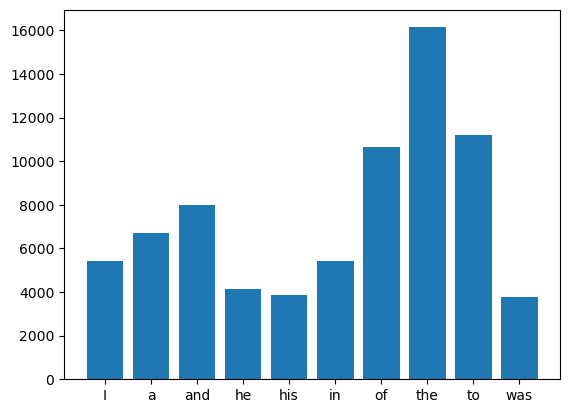

In [34]:
import matplotlib.pyplot as plt

top_elem = sorted(dic_top_10.items())
_
x, y = zip(*top_elem)

plt.bar(x, y)
plt.show()

In [37]:
bottom_10 = without_stop_words.takeOrdered(10, key=lambda x: x[1])
print(bottom_10)

[('Author:', 1), ('Date:', 1), ('2004', 1), ('29,', 1), ('2002', 1), ('Language:', 1), ('Character', 1), ('UTF-8', 1), ('II', 1), ('III', 1)]


In [39]:
dic_bottom_10 = dict(bottom_10)
print(dic_bottom_10)

{'Author:': 1, 'Date:': 1, '2004': 1, '29,': 1, '2002': 1, 'Language:': 1, 'Character': 1, 'UTF-8': 1, 'II': 1, 'III': 1}


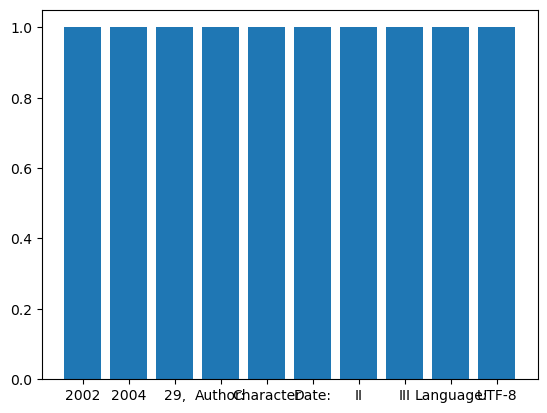

In [40]:
import matplotlib.pyplot as plt

bottom_elem = sorted(dic_bottom_10.items())
_
x, y = zip(*bottom_elem)

plt.bar(x, y)
plt.show()